In [1]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

cap = cv2.VideoCapture(0)

# Lip landmark indices (MediaPipe standard)
OUTER_LIPS = [
    61, 146, 91, 181, 84, 17,
    314, 405, 321, 375, 291, 308
]

INNER_LIPS = [
    78, 95, 88, 178, 87, 14,
    317, 402, 318, 324, 308
]

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    h, w, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:

            # Convert landmarks to pixel coords
            outer_pts = []
            inner_pts = []

            for idx in OUTER_LIPS:
                lm = face_landmarks.landmark[idx]
                outer_pts.append([int(lm.x * w), int(lm.y * h)])

            for idx in INNER_LIPS:
                lm = face_landmarks.landmark[idx]
                inner_pts.append([int(lm.x * w), int(lm.y * h)])

            outer_pts = np.array(outer_pts, np.int32)
            inner_pts = np.array(inner_pts, np.int32)

            # Draw lip contour
            cv2.polylines(frame, [outer_pts], True, (0, 255, 0), 2)

            # Blacken mouth opening
            cv2.fillPoly(frame, [inner_pts], (0, 0, 0))

    cv2.imshow("Lip Contour & Mouth Mask", frame)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC to exit
        break

cap.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'cv2'

In [2]:
import cv2
import mediapipe as mp
import numpy as np

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

cap = cv2.VideoCapture(0)

OUTER_LIPS = [
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 375, 321, 405, 314, 17, 84, 181, 91, 146
]

INNER_LIPS = [
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    308, 324, 318, 402, 317, 14, 87, 178, 88, 95
]

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    h, w, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:

            outer_pts = np.array([
                [int(face_landmarks.landmark[i].x * w),
                 int(face_landmarks.landmark[i].y * h)]
                for i in OUTER_LIPS
            ], np.int32)

            inner_pts = np.array([
                [int(face_landmarks.landmark[i].x * w),
                 int(face_landmarks.landmark[i].y * h)]
                for i in INNER_LIPS
            ], np.int32)

            # Draw full lip contour
            cv2.polylines(frame, [outer_pts], isClosed=True, color=(0, 255, 0), thickness=2)

            # Blacken mouth opening
            cv2.fillPoly(frame, [inner_pts], (0, 0, 0))

    cv2.imshow("Full Lip Contour + Mouth Opening", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'cv2'

In [3]:
import cv2
import mediapipe as mp
import numpy as np

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

cap = cv2.VideoCapture(0)

OUTER_LIPS = [
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 375, 321, 405, 314, 17, 84, 181, 91, 146
]

INNER_LIPS = [
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    308, 324, 318, 402, 317, 14, 87, 178, 88, 95
]

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    h, w, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]

        outer_pts = np.array([
            [int(face_landmarks.landmark[i].x * w),
             int(face_landmarks.landmark[i].y * h)]
            for i in OUTER_LIPS
        ], np.int32)

        inner_pts = np.array([
            [int(face_landmarks.landmark[i].x * w),
             int(face_landmarks.landmark[i].y * h)]
            for i in INNER_LIPS
        ], np.int32)

        # Bounding box around lips
        x, y, bw, bh = cv2.boundingRect(outer_pts)

        # Create white canvas
        lip_roi = np.ones((bh, bw, 3), dtype=np.uint8) * 255

        # Shift points to ROI coordinates
        outer_shifted = outer_pts - [x, y]
        inner_shifted = inner_pts - [x, y]

        # Fill lips area with gray
        cv2.fillPoly(lip_roi, [outer_shifted], (180, 180, 180))

        # Fill mouth opening with black
        cv2.fillPoly(lip_roi, [inner_shifted], (0, 0, 0))

        # Optional: draw bounding box on original frame
        cv2.rectangle(frame, (x, y), (x + bw, y + bh), (0, 255, 0), 2)

        cv2.imshow("Lip ROI (Gray Lips, Black Mouth, White Background)", lip_roi)

    cv2.imshow("Camera", frame)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'cv2'

In [2]:
import torch; print(torch.cuda.is_available())


True


In [3]:
import cv2
import mediapipe as mp
import torch
import sklearn

print("cv2:", cv2.__version__)
print("mediapipe OK")
print("torch:", torch.__version__)


cv2: 4.13.0
mediapipe OK
torch: 2.7.1+cu118


In [9]:
import cv2
import mediapipe as mp
import numpy as np

# MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

cap = cv2.VideoCapture(0)

# Full lip landmark loops
OUTER_LIPS = [
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 375, 321, 405, 314, 17, 84, 181, 91, 146
]

INNER_LIPS = [
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    308, 324, 318, 402, 317, 14, 87, 178, 88, 95
]

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    h, w, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]

        outer_pts = np.array([
            [int(face_landmarks.landmark[i].x * w),
             int(face_landmarks.landmark[i].y * h)]
            for i in OUTER_LIPS
        ], np.int32)

        inner_pts = np.array([
            [int(face_landmarks.landmark[i].x * w),
             int(face_landmarks.landmark[i].y * h)]
            for i in INNER_LIPS
        ], np.int32)

        # Lip bounding box
        x, y, bw, bh = cv2.boundingRect(outer_pts)

        # White ROI
        lip_roi = np.ones((bh, bw, 3), dtype=np.uint8) * 255

        # Shift landmarks to ROI coordinates
        outer_shifted = outer_pts - [x, y]
        inner_shifted = inner_pts - [x, y]

        # Fill lips gray
        cv2.fillPoly(lip_roi, [outer_shifted], (180, 180, 180))

        # Fill mouth opening black
        cv2.fillPoly(lip_roi, [inner_shifted], (0, 0, 0))

        # Normalize to [0,1]
        lip_norm = lip_roi.astype(np.float32) / 255.0

        # Resize for ML
        lip_norm = cv2.resize(lip_norm, (128, 64))

        # Draw bounding box on original frame
        cv2.rectangle(frame, (x, y), (x + bw, y + bh), (0, 255, 0), 2)

        cv2.imshow("Normalized Lip ROI", lip_norm)

    cv2.imshow("Camera", frame)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC
        break

cap.release()
cv2.destroyAllWindows()


In [11]:
import cv2
import mediapipe as mp
import numpy as np

# MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.23,
    min_tracking_confidence=0.5
)

cap = cv2.VideoCapture(0)

# Full lip landmark loops
OUTER_LIPS = [
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 375, 321, 405, 314, 17, 84, 181, 91, 146
]

INNER_LIPS = [
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    308, 324, 318, 402, 317, 14, 87, 178, 88, 95
]

# Padding control (CHANGE THESE)
PAD_X_RATIO = 0.15   # 15% width padding
PAD_Y_RATIO = 0.15   # 15% height padding

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    h, w, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]

        outer_pts = np.array([
            [int(face_landmarks.landmark[i].x * w),
             int(face_landmarks.landmark[i].y * h)]
            for i in OUTER_LIPS
        ], np.int32)

        inner_pts = np.array([
            [int(face_landmarks.landmark[i].x * w),
             int(face_landmarks.landmark[i].y * h)]
            for i in INNER_LIPS
        ], np.int32)

        # Base lip bounding box
        x, y, bw, bh = cv2.boundingRect(outer_pts)

        # Dynamic padding
        pad_x = int(PAD_X_RATIO * bw)
        pad_y = int(PAD_Y_RATIO * bh)

        x = max(0, x - pad_x)
        y = max(0, y - pad_y)
        bw = min(w - x, bw + 2 * pad_x)
        bh = min(h - y, bh + 2 * pad_y)

        # White ROI
        lip_roi = np.ones((bh, bw, 3), dtype=np.uint8) * 255

        # Shift landmarks into ROI space
        outer_shifted = outer_pts - [x, y]
        inner_shifted = inner_pts - [x, y]

        # Fill lips (gray)
        cv2.fillPoly(lip_roi, [outer_shifted], (180, 180, 180))

        # Fill mouth opening (black)
        cv2.fillPoly(lip_roi, [inner_shifted], (0, 0, 0))

        # Normalize to [0,1]
        lip_norm = lip_roi.astype(np.float32) / 255.0

        # Resize (ML-ready)
        lip_norm = cv2.resize(lip_norm, (128, 64))

        # Draw bounding box on original frame
        cv2.rectangle(frame, (x, y), (x + bw, y + bh), (0, 255, 0), 2)

        cv2.imshow("Normalized Lip ROI", lip_norm)

    cv2.imshow("Camera", frame)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC
        break

cap.release()
cv2.destroyAllWindows()


In [12]:
import cv2
import mediapipe as mp
import numpy as np

# MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

cap = cv2.VideoCapture(0)

# Full lip landmark loops
OUTER_LIPS = [
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 375, 321, 405, 314, 17, 84, 181, 91, 146
]

INNER_LIPS = [
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    308, 324, 318, 402, 317, 14, 87, 178, 88, 95
]

# Padding control (fixed pixels)
PAD_X = 30  # horizontal padding in pixels
PAD_Y = 15  # vertical padding in pixels

# Fixed aspect ratio (width : height)
ASPECT_RATIO = 2.0  # e.g., width is twice height

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    h, w, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]

        outer_pts = np.array([
            [int(face_landmarks.landmark[i].x * w),
             int(face_landmarks.landmark[i].y * h)]
            for i in OUTER_LIPS
        ], np.int32)

        inner_pts = np.array([
            [int(face_landmarks.landmark[i].x * w),
             int(face_landmarks.landmark[i].y * h)]
            for i in INNER_LIPS
        ], np.int32)

        # Base lip bounding box
        x, y, bw, bh = cv2.boundingRect(outer_pts)

        # Add fixed padding
        x = max(0, x - PAD_X)
        y = max(0, y - PAD_Y)
        bw = min(w - x, bw + 2 * PAD_X)
        bh = min(h - y, bh + 2 * PAD_Y)

        # Adjust to fixed aspect ratio (width = ASPECT_RATIO * height)
        desired_bw = int(ASPECT_RATIO * bh)
        dw = desired_bw - bw
        x = max(0, x - dw // 2)
        bw = min(w - x, desired_bw)

        # White ROI
        lip_roi = np.ones((bh, bw, 3), dtype=np.uint8) * 255

        # Shift landmarks into ROI space
        outer_shifted = outer_pts - [x, y]
        inner_shifted = inner_pts - [x, y]

        # Fill lips gray
        cv2.fillPoly(lip_roi, [outer_shifted], (180, 180, 180))

        # Fill mouth opening black
        cv2.fillPoly(lip_roi, [inner_shifted], (0, 0, 0))

        # Normalize to [0,1]
        lip_norm = lip_roi.astype(np.float32) / 255.0

        # Resize (ML-ready)
        lip_norm = cv2.resize(lip_norm, (128, 64))

        # Draw bounding box on original frame
        cv2.rectangle(frame, (x, y), (x + bw, y + bh), (0, 255, 0), 2)

        cv2.imshow("Normalized Lip ROI", lip_norm)

    cv2.imshow("Camera", frame)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC
        break

cap.release()
cv2.destroyAllWindows()


In [10]:
import cv2
import mediapipe as mp
import numpy as np
from collections import deque
import torch
import torch.nn as nn

# ------------------------
# SETTINGS
# ------------------------
NUM_CLASSES = 3
FRAMES_PER_SAMPLE = 50
FRAME_H, FRAME_W = 128, 64
FEATURE_DIM = FRAME_H * FRAME_W
PAD_X, PAD_Y = 30, 15
ASPECT_RATIO = 2.0

CLASS_NAMES = ["mathi", "tala", "Daya"]
MODEL_PATH = "lip_lstm.pth"

# ------------------------
# MEDIA PIPE
# ------------------------
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

OUTER_LIPS = [
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 375, 321, 405, 314, 17, 84, 181, 91, 146
]
INNER_LIPS = [
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    308, 324, 318, 402, 317, 14, 87, 178, 88, 95
]

# ------------------------
# MODEL
# ------------------------
class LipLSTM(nn.Module):
    def __init__(self, feature_dim, hidden_sizes=[256,128,64], num_classes=NUM_CLASSES, dropout=0.3):
        super().__init__()
        self.lstm1 = nn.LSTM(feature_dim, hidden_sizes[0], batch_first=True)
        self.lstm2 = nn.LSTM(hidden_sizes[0], hidden_sizes[1], batch_first=True)
        self.lstm3 = nn.LSTM(hidden_sizes[1], hidden_sizes[2], batch_first=True)
        self.fc1 = nn.Linear(hidden_sizes[2], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.leaky_relu(out)
        out, _ = self.lstm2(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)
        out, _ = self.lstm3(out)
        out = self.leaky_relu(out[:, -1, :])
        out = self.dropout(out)
        out = self.leaky_relu(self.fc1(out))
        out = self.dropout(out)
        out = self.leaky_relu(self.fc2(out))
        out = self.fc3(out)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LipLSTM(FEATURE_DIM).to(device)
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()

# ------------------------
# CAMERA
# ------------------------
cap = cv2.VideoCapture(0)
sequence = deque(maxlen=FRAMES_PER_SAMPLE)

while True:
    ret, frame = cap.read()
    if not ret:
        continue

    h, w, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    lip_display = None

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]

        # Lip ROI
        outer_pts = np.array([[int(face_landmarks.landmark[i].x * w),
                               int(face_landmarks.landmark[i].y * h)] for i in OUTER_LIPS], np.int32)
        inner_pts = np.array([[int(face_landmarks.landmark[i].x * w),
                               int(face_landmarks.landmark[i].y * h)] for i in INNER_LIPS], np.int32)

        x, y, bw, bh = cv2.boundingRect(outer_pts)
        x = max(0, x - PAD_X)
        y = max(0, y - PAD_Y)
        bw = min(w - x, bw + 2*PAD_X)
        bh = min(h - y, bh + 2*PAD_Y)

        desired_bw = int(ASPECT_RATIO * bh)
        dw = desired_bw - bw
        x = max(0, x - dw // 2)
        bw = min(w - x, desired_bw)

        lip_roi = np.ones((bh, bw, 3), dtype=np.uint8) * 255
        outer_shifted = outer_pts - [x, y]
        inner_shifted = inner_pts - [x, y]
        cv2.fillPoly(lip_roi, [outer_shifted], (180,180,180))
        cv2.fillPoly(lip_roi, [inner_shifted], (0,0,0))

        # ------------------------
        # SHOW LIP CONTOUR WINDOW (correct aspect ratio)
        # ------------------------
        scale = 2  # upscale for visibility
        h_roi, w_roi = lip_roi.shape[:2]
        lip_display = cv2.resize(lip_roi, (int(w_roi*scale), int(h_roi*scale)))

        # Convert for model
        lip_gray = cv2.cvtColor(lip_roi, cv2.COLOR_BGR2GRAY)
        lip_norm = cv2.resize(lip_gray, (FRAME_W, FRAME_H))
        lip_norm = lip_norm.astype(np.float32) / 255.0
        sequence.append(lip_norm.flatten())

        # ------------------------
        # Predict when we have enough frames
        # ------------------------
        if len(sequence) == FRAMES_PER_SAMPLE:
            input_seq = torch.tensor(np.array(sequence), dtype=torch.float32).unsqueeze(0).to(device)
            with torch.no_grad():
                preds = model(input_seq)
                probs = torch.softmax(preds, dim=1).cpu().numpy()[0]
                pred_class = probs.argmax()
                pred_name = CLASS_NAMES[pred_class]

            # Display prediction
            cv2.putText(frame, f"Predicted: {pred_name}", (10,30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

            # Confidence bars
            start_y = 50
            for i, (name, prob) in enumerate(zip(CLASS_NAMES, probs)):
                bar_len = int(prob*200)
                cv2.rectangle(frame, (10, start_y + i*25), (10+bar_len, start_y+i*25+20), (0,255,0), -1)
                cv2.putText(frame, f"{name}: {prob*100:.1f}%", (220, start_y+i*25+15),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)

    # ------------------------
    # SHOW WINDOWS
    # ------------------------
    cv2.imshow("Camera", frame)
    if lip_display is not None:
        cv2.imshow("Lip Contour", lip_display)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


In [10]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh


AttributeError: module 'mediapipe' has no attribute 'solutions'

In [3]:
import os
import cv2
import numpy as np
import shutil

# ------------------------
# SETTINGS
# ------------------------
DATA_DIR = "databig"           # original folder with class_x/sample_y/frames
OUTPUT_DIR = "npy_databig"     # where numpy arrays will be saved
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ------------------------
# COPY FOLDER STRUCTURE & CONVERT
# ------------------------
classes = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])

for class_name in classes:
    class_input_folder = os.path.join(DATA_DIR, class_name)
    class_output_folder = os.path.join(OUTPUT_DIR, class_name)
    os.makedirs(class_output_folder, exist_ok=True)

    samples = sorted([s for s in os.listdir(class_input_folder) if os.path.isdir(os.path.join(class_input_folder, s))])
    for sample_name in samples:
        sample_input_folder = os.path.join(class_input_folder, sample_name)
        sample_output_folder = os.path.join(class_output_folder, sample_name)
        os.makedirs(sample_output_folder, exist_ok=True)

        frames = sorted([f for f in os.listdir(sample_input_folder) if f.endswith(".png") or f.endswith(".jpg")])
        for frame_file in frames:
            frame_path = os.path.join(sample_input_folder, frame_file)
            img = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)  # already grayscale
            img_array = np.array(img, dtype=np.float32)         # convert to array
            npy_path = os.path.join(sample_output_folder, frame_file.replace(".png", ".npy").replace(".jpg", ".npy"))
            np.save(npy_path, img_array)                        # save as .npy

print(f"All frames converted to numpy arrays and saved in '{OUTPUT_DIR}'")


All frames converted to numpy arrays and saved in 'npy_databig'


In [4]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# ------------------------
# SETTINGS
# ------------------------
DATA_DIR = "npy_databig"  # folder structure: npy_data/class_x/sample_y/*.npy
NUM_CLASSES = 3
FRAMES_PER_SAMPLE = 50  # sequence length
FRAME_H, FRAME_W = 128, 64
FEATURE_DIM = FRAME_H * FRAME_W

# ------------------------
# DATASET
# ------------------------
class LipNpyDataset(Dataset):
    def __init__(self, data_dir, frames_per_sample=50):
        self.samples = []
        self.labels = []

        for class_idx in range(NUM_CLASSES):
            class_folder = os.path.join(data_dir, f"class_{class_idx}")
            sample_folders = sorted([s for s in os.listdir(class_folder) if os.path.isdir(os.path.join(class_folder, s))])

            for sample_name in sample_folders:
                sample_folder = os.path.join(class_folder, sample_name)
                npy_files = sorted([f for f in os.listdir(sample_folder) if f.endswith(".npy")])

                if len(npy_files) < frames_per_sample:
                    continue  # skip incomplete samples

                sequence = []
                for f in npy_files[:frames_per_sample]:
                    arr = np.load(os.path.join(sample_folder, f))
                    arr = np.resize(arr, (FRAME_H * FRAME_W))  # flatten
                    sequence.append(arr)

                self.samples.append(np.array(sequence))  # shape: (frames, feature_dim)
                self.labels.append(class_idx)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        x = torch.tensor(self.samples[idx], dtype=torch.float32)
        y = torch.tensor(self.labels[idx], dtype=torch.long)
        return x, y

# ------------------------
# DATALOADER
# ------------------------
dataset = LipNpyDataset(DATA_DIR, FRAMES_PER_SAMPLE)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
print("Dataset size:", len(dataset))


Dataset size: 300


In [5]:
import torch.nn as nn

FEATURE_DIM = 128 * 64 # 128*64=8192
SEQUENCE_LENGTH = FRAMES_PER_SAMPLE

class LipLSTM(nn.Module):
    def __init__(self, feature_dim, hidden_sizes=[256,128,64], num_classes=NUM_CLASSES, dropout=0.3):
        super(LipLSTM, self).__init__()

        self.lstm1 = nn.LSTM(input_size=feature_dim, hidden_size=hidden_sizes[0], batch_first=True)
        self.lstm2 = nn.LSTM(input_size=hidden_sizes[0], hidden_size=hidden_sizes[1], batch_first=True)
        self.lstm3 = nn.LSTM(input_size=hidden_sizes[1], hidden_size=hidden_sizes[2], batch_first=True)

        self.fc1 = nn.Linear(hidden_sizes[2], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)

        self.leaky_relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.leaky_relu(out)
        out, _ = self.lstm2(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)
        out, _ = self.lstm3(out)
        out = self.leaky_relu(out)
        out = self.dropout(out[:, -1, :])  # take last timestep
        out = self.leaky_relu(self.fc1(out))
        out = self.dropout(out)
        out = self.leaky_relu(self.fc2(out))
        out = self.fc3(out)  # logits
        return out

# ------------------------
# INITIALIZE MODEL
# ------------------------
model = LipLSTM(FEATURE_DIM)
print(model)


LipLSTM(
  (lstm1): LSTM(8192, 256, batch_first=True)
  (lstm2): LSTM(256, 128, batch_first=True)
  (lstm3): LSTM(128, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [5]:
import torch
import torch.nn as nn

class LipLSTM(nn.Module):
    def __init__(
        self,
        feature_dim,
        hidden_sizes=[256, 128, 64],
        num_classes=NUM_CLASSES,
        dropout=0.3,
        cnn_channels=128,
        kernel_size=3
    ):
        super(LipLSTM, self).__init__()

        # ---------- CNN FRONT ----------
        self.cnn = nn.Sequential(
            nn.Conv1d(
                in_channels=feature_dim,
                out_channels=cnn_channels,
                kernel_size=kernel_size,
                padding=kernel_size // 2
            ),
            nn.BatchNorm1d(cnn_channels),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout)
        )

        # ---------- LSTM STACK ----------
        self.lstm1 = nn.LSTM(
            input_size=cnn_channels,
            hidden_size=hidden_sizes[0],
            batch_first=True
        )
        self.lstm2 = nn.LSTM(
            input_size=hidden_sizes[0],
            hidden_size=hidden_sizes[1],
            batch_first=True
        )
        self.lstm3 = nn.LSTM(
            input_size=hidden_sizes[1],
            hidden_size=hidden_sizes[2],
            batch_first=True
        )

        # ---------- FC HEAD ----------
        self.fc1 = nn.Linear(hidden_sizes[2], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)

        self.leaky_relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # x shape: (batch, time, feature_dim)

        # ---- CNN ----
        x = x.permute(0, 2, 1)     # (batch, feature_dim, time)
        x = self.cnn(x)
        x = x.permute(0, 2, 1)     # (batch, time, cnn_channels)

        # ---- LSTM ----
        out, _ = self.lstm1(x)
        out = self.leaky_relu(out)

        out, _ = self.lstm2(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)

        out, _ = self.lstm3(out)

        # last time step
        out = self.leaky_relu(out[:, -1, :])
        out = self.dropout(out)

        # ---- FC ----
        out = self.leaky_relu(self.fc1(out))
        out = self.dropout(out)
        out = self.leaky_relu(self.fc2(out))
        out = self.fc3(out)

        return out


MORE COMPLEXITY

In [13]:
import torch.nn as nn

FEATURE_DIM = 128 * 64
NUM_CLASSES = 3
SEQUENCE_LENGTH = 50  # frames per sample

class LipLSTM(nn.Module):
    def __init__(self, feature_dim, hidden_sizes=[512, 256, 128, 64], num_classes=NUM_CLASSES, dropout=0.4):
        super(LipLSTM, self).__init__()

        # 4-layer LSTM stack
        self.lstm1 = nn.LSTM(input_size=feature_dim, hidden_size=hidden_sizes[0], batch_first=True)
        self.lstm2 = nn.LSTM(input_size=hidden_sizes[0], hidden_size=hidden_sizes[1], batch_first=True)
        self.lstm3 = nn.LSTM(input_size=hidden_sizes[1], hidden_size=hidden_sizes[2], batch_first=True)
        self.lstm4 = nn.LSTM(input_size=hidden_sizes[2], hidden_size=hidden_sizes[3], batch_first=True)

        # Fully connected layers
        self.fc1 = nn.Linear(hidden_sizes[3], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, num_classes)

        # Activation & regularization
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(dropout)
        self.batchnorm1 = nn.BatchNorm1d(hidden_sizes[3])
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.leaky_relu(out)
        out, _ = self.lstm2(out)
        out = self.leaky_relu(out)
        out, _ = self.lstm3(out)
        out = self.leaky_relu(out)
        out, _ = self.lstm4(out)
        out = self.leaky_relu(out[:, -1, :])  # last timestep
        out = self.batchnorm1(out)
        out = self.dropout(out)

        out = self.leaky_relu(self.fc1(out))
        out = self.batchnorm2(out)
        out = self.dropout(out)

        out = self.leaky_relu(self.fc2(out))
        out = self.batchnorm3(out)
        out = self.dropout(out)

        out = self.leaky_relu(self.fc3(out))
        out = self.fc4(out)  # logits
        return out

# ------------------------
# TEST
# ------------------------
model = LipLSTM(FEATURE_DIM)
print(model)


LipLSTM(
  (lstm1): LSTM(8192, 512, batch_first=True)
  (lstm2): LSTM(512, 256, batch_first=True)
  (lstm3): LSTM(256, 128, batch_first=True)
  (lstm4): LSTM(128, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=3, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.4, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [18]:
MODEL_PATH = "lip_lstm.pth"  # you can change the filename

torch.save(model.state_dict(), MODEL_PATH)
print(f"Model weights saved to {MODEL_PATH}")

Model weights saved to lip_lstm.pth


In [6]:
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(60):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in dataloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(dataset):.6f}")


Epoch 1, Loss: 1.086323
Epoch 2, Loss: 0.778891
Epoch 3, Loss: 0.670027
Epoch 4, Loss: 0.587809
Epoch 5, Loss: 0.570852
Epoch 6, Loss: 0.783436
Epoch 7, Loss: 1.064317
Epoch 8, Loss: 1.021475
Epoch 9, Loss: 1.004521
Epoch 10, Loss: 1.015887
Epoch 11, Loss: 0.984028
Epoch 12, Loss: 0.965290
Epoch 13, Loss: 1.031117
Epoch 14, Loss: 1.058656
Epoch 15, Loss: 1.044846
Epoch 16, Loss: 0.987508
Epoch 17, Loss: 0.987459
Epoch 18, Loss: 1.022289
Epoch 19, Loss: 0.874060
Epoch 20, Loss: 0.786705
Epoch 21, Loss: 0.809002
Epoch 22, Loss: 0.695024
Epoch 23, Loss: 0.744005
Epoch 24, Loss: 0.654521
Epoch 25, Loss: 0.780717
Epoch 26, Loss: 0.645776
Epoch 27, Loss: 0.692563
Epoch 28, Loss: 0.650617
Epoch 29, Loss: 0.721742
Epoch 30, Loss: 0.608686
Epoch 31, Loss: 0.617331
Epoch 32, Loss: 0.555190
Epoch 33, Loss: 0.551157
Epoch 34, Loss: 0.581331
Epoch 35, Loss: 0.589101
Epoch 36, Loss: 0.552825
Epoch 37, Loss: 0.534206
Epoch 38, Loss: 0.501995
Epoch 39, Loss: 0.546141
Epoch 40, Loss: 0.557523
Epoch 41,

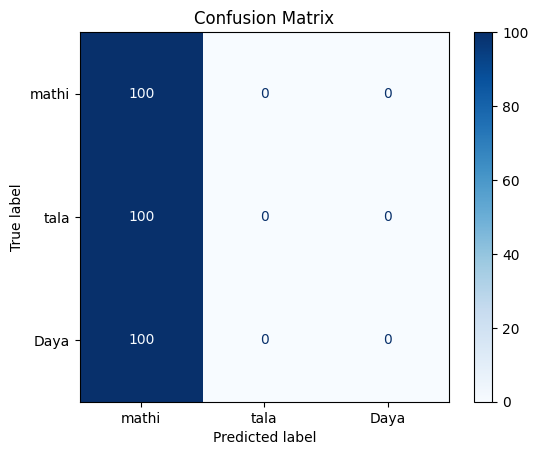

In [7]:
import os
import cv2
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Settings
FRAME_H, FRAME_W = 128, 64
FEATURE_DIM = FRAME_H * FRAME_W
CLASS_NAMES = ["mathi","tala","Daya"]
DATA_DIR = "databig"  # test dataset path

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.eval()  # already loaded

y_true = []
y_pred = []

# Loop over classes
for class_idx, class_name in enumerate(CLASS_NAMES):
    class_path = os.path.join(DATA_DIR, f"class_{class_idx}")
    if not os.path.exists(class_path):
        continue
    for sample_folder in os.listdir(class_path):
        sample_path = os.path.join(class_path, sample_folder)
        if not os.path.isdir(sample_path):
            continue

        # Collect frames in this sample
        frames = []
        for frame_file in sorted(os.listdir(sample_path)):
            frame_path = os.path.join(sample_path, frame_file)
            img = cv2.imread(frame_path)  # shape: (H,W,3)
            if img is None:
                continue
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            gray = cv2.resize(gray, (FRAME_W, FRAME_H))
            gray = gray.astype(np.float32)/255.0
            frames.append(gray.flatten())

        # Make prediction if we have full sequence
        if len(frames) != 50:
            continue  # skip incomplete sequences

        input_seq = torch.tensor(np.array(frames), dtype=torch.float32).unsqueeze(0).to(device)
        with torch.no_grad():
            preds = model(input_seq)
            probs = torch.softmax(preds, dim=1).cpu().numpy()[0]
            predicted_class = probs.argmax()

        y_true.append(class_idx)
        y_pred.append(predicted_class)

# ------------------------
# Confusion matrix
# ------------------------
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=CLASS_NAMES)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [43]:
import os
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ------------------------
# SETTINGS
# ------------------------
NUM_CLASSES = 8
FRAMES_PER_SAMPLE = 50
FRAME_H, FRAME_W = 128, 64
FEATURE_DIM = FRAME_H * FRAME_W
MODEL_PATH = "lip_lstm.pth"
DATA_DIR = "data"  # your dataset folder

CLASS_NAMES = [
    "Hello",
    "Yes",
    "No",
    "Thank You",
    "Love",
    "Smile",
    "Open",
    "Close"
]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ------------------------
# MODEL
# ------------------------
class LipLSTM(nn.Module):
    def __init__(self, feature_dim, hidden_sizes=[256,128,64], num_classes=NUM_CLASSES, dropout=0.3):
        super(LipLSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size=feature_dim, hidden_size=hidden_sizes[0], batch_first=True)
        self.lstm2 = nn.LSTM(input_size=hidden_sizes[0], hidden_size=hidden_sizes[1], batch_first=True)
        self.lstm3 = nn.LSTM(input_size=hidden_sizes[1], hidden_size=hidden_sizes[2], batch_first=True)
        self.fc1 = nn.Linear(hidden_sizes[2], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.leaky_relu(out)
        out, _ = self.lstm2(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)
        out, _ = self.lstm3(out)
        out = self.leaky_relu(out[:, -1, :])
        out = self.dropout(out)
        out = self.leaky_relu(self.fc1(out))
        out = self.dropout(out)
        out = self.leaky_relu(self.fc2(out))
        out = self.fc3(out)
        return out

# ------------------------
# LOAD MODEL
# ------------------------
model = LipLSTM(FEATURE_DIM).to(device)
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()

# ------------------------
# LOAD DATA & PREDICT
# ------------------------
y_true = []
y_pred = []

for class_idx in range(NUM_CLASSES):
    class_folder = os.path.join(DATA_DIR, f"class_{class_idx}")
    samples = sorted(os.listdir(class_folder))

    for sample in samples:
        sample_folder = os.path.join(class_folder, sample)
        # load frames
        frames = sorted(os.listdir(sample_folder))
        sequence = []
        for f in frames[:FRAMES_PER_SAMPLE]:
            img_path = os.path.join(sample_folder, f)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (FRAME_W, FRAME_H)).astype(np.float32) / 255.0
            sequence.append(img.flatten())
        sequence = np.array(sequence)
        input_seq = torch.tensor(sequence, dtype=torch.float32).unsqueeze(0).to(device)

        # predict
        with torch.no_grad():
            output = model(input_seq)
            pred_class = output.argmax(dim=1).item()

        y_true.append(class_idx)
        y_pred.append(pred_class)

# ------------------------
# CONFUSION MATRIX
# ------------------------
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
disp.plot(cmap='Blues', xticks_rotation=45)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [26]:
import torch
import torch.nn as nn

class LipLSTM(nn.Module):
    def __init__(self, feature_dim, hidden_sizes=[256,128,64], num_classes=3, dropout=0.3):
        super(LipLSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size=feature_dim, hidden_size=hidden_sizes[0], batch_first=True)
        self.lstm2 = nn.LSTM(input_size=hidden_sizes[0], hidden_size=hidden_sizes[1], batch_first=True)
        self.lstm3 = nn.LSTM(input_size=hidden_sizes[1], hidden_size=hidden_sizes[2], batch_first=True)
        
        # FC layers exactly as in checkpoint
        self.fc1 = nn.Linear(hidden_sizes[2], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

        self.leaky_relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.leaky_relu(out)
        out, _ = self.lstm2(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)
        out, _ = self.lstm3(out)
        out = self.leaky_relu(out[:, -1, :])  # last timestep
        out = self.dropout(out)
        out = self.leaky_relu(self.fc1(out))
        out = self.dropout(out)
        out = self.leaky_relu(self.fc2(out))
        out = self.fc3(out)  # logits
        return out


In [1]:
import cv2
import mediapipe as mp
import numpy as np
import torch
import torch.nn as nn
from collections import deque

# ------------------------
# SETTINGS
# ------------------------
NUM_CLASSES = 3
FRAMES_PER_SAMPLE = 50
FRAME_H, FRAME_W = 128, 64
FEATURE_DIM = FRAME_H * FRAME_W
MODEL_PATH = "lip_lstm.pth"

PAD_X, PAD_Y = 30, 15
ASPECT_RATIO = 2.0

CLASS_NAMES = ["mathi", "tala", "Daya"]

# ------------------------
# MEDIA PIPE
# ------------------------
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

OUTER_LIPS = [
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 375, 321, 405, 314, 17, 84, 181, 91, 146
]
INNER_LIPS = [
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    308, 324, 318, 402, 317, 14, 87, 178, 88, 95
]

# ------------------------
# MODEL
# ------------------------

class LipLSTM(nn.Module):
    def __init__(
        self,
        feature_dim,
        hidden_sizes=[256, 128, 64],
        num_classes=NUM_CLASSES,
        dropout=0.3,
        cnn_channels=128,
        kernel_size=3
    ):
        super(LipLSTM, self).__init__()

        # ---------- CNN FRONT ----------
        self.cnn = nn.Sequential(
            nn.Conv1d(
                in_channels=feature_dim,
                out_channels=cnn_channels,
                kernel_size=kernel_size,
                padding=kernel_size // 2
            ),
            nn.BatchNorm1d(cnn_channels),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout)
        )

        # ---------- LSTM STACK ----------
        self.lstm1 = nn.LSTM(
            input_size=cnn_channels,
            hidden_size=hidden_sizes[0],
            batch_first=True
        )
        self.lstm2 = nn.LSTM(
            input_size=hidden_sizes[0],
            hidden_size=hidden_sizes[1],
            batch_first=True
        )
        self.lstm3 = nn.LSTM(
            input_size=hidden_sizes[1],
            hidden_size=hidden_sizes[2],
            batch_first=True
        )

        # ---------- FC HEAD ----------
        self.fc1 = nn.Linear(hidden_sizes[2], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)

        self.leaky_relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # x shape: (batch, time, feature_dim)

        # ---- CNN ----
        x = x.permute(0, 2, 1)     # (batch, feature_dim, time)
        x = self.cnn(x)
        x = x.permute(0, 2, 1)     # (batch, time, cnn_channels)

        # ---- LSTM ----
        out, _ = self.lstm1(x)
        out = self.leaky_relu(out)

        out, _ = self.lstm2(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)

        out, _ = self.lstm3(out)

        # last time step
        out = self.leaky_relu(out[:, -1, :])
        out = self.dropout(out)

        # ---- FC ----
        out = self.leaky_relu(self.fc1(out))
        out = self.dropout(out)
        out = self.leaky_relu(self.fc2(out))
        out = self.fc3(out)

        return out


# ------------------------
# LOAD MODEL
# ------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LipLSTM(FEATURE_DIM).to(device)
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()

# ------------------------
# CAMERA
# ------------------------
cap = cv2.VideoCapture(0)
sequence = deque(maxlen=FRAMES_PER_SAMPLE)

while True:
    ret, frame = cap.read()
    if not ret:
        continue

    h, w, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    lip_display = None  # window for processed lip ROI

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]

        outer_pts = np.array([[int(face_landmarks.landmark[i].x * w),
                               int(face_landmarks.landmark[i].y * h)] for i in OUTER_LIPS], np.int32)
        inner_pts = np.array([[int(face_landmarks.landmark[i].x * w),
                               int(face_landmarks.landmark[i].y * h)] for i in INNER_LIPS], np.int32)

        x, y, bw, bh = cv2.boundingRect(outer_pts)
        x = max(0, x - PAD_X)
        y = max(0, y - PAD_Y)
        bw = min(w - x, bw + 2 * PAD_X)
        bh = min(h - y, bh + 2 * PAD_Y)

        # Adjust to keep aspect ratio
        desired_bw = int(ASPECT_RATIO * bh)
        dw = desired_bw - bw
        x = max(0, x - dw // 2)
        bw = min(w - x, desired_bw)

        lip_roi = np.ones((bh, bw, 3), dtype=np.uint8) * 255
        outer_shifted = outer_pts - [x, y]
        inner_shifted = inner_pts - [x, y]
        cv2.fillPoly(lip_roi, [outer_shifted], (180, 180, 180))
        cv2.fillPoly(lip_roi, [inner_shifted], (0, 0, 0))

        # Normalize & resize
        lip_gray = cv2.cvtColor(lip_roi, cv2.COLOR_BGR2GRAY)
        lip_norm = cv2.resize(lip_gray, (FRAME_W, FRAME_H))
        lip_flat = lip_norm.astype(np.float32) / 255.0
        sequence.append(lip_flat.flatten())

        # Keep a display version
        lip_display = cv2.resize(lip_gray, (FRAME_W*4, FRAME_H*4))  # scale up for visibility

        # Predict
        if len(sequence) == FRAMES_PER_SAMPLE:
            input_seq = torch.tensor(np.array(sequence), dtype=torch.float32).unsqueeze(0).to(device)
            with torch.no_grad():
                preds = model(input_seq)
                predicted_class = preds.argmax(dim=1).item()
                predicted_name = CLASS_NAMES[predicted_class]

            cv2.putText(frame, f"Predicted: {predicted_name}",
                        (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    # Show both windows
    cv2.imshow("Webcam Feed", frame)
    if lip_display is not None:
        cv2.imshow("Processed Lip ROI", lip_display)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC to quit
        break

cap.release()
cv2.destroyAllWindows()


RuntimeError: Error(s) in loading state_dict for LipLSTM:
	Missing key(s) in state_dict: "cnn.0.weight", "cnn.0.bias", "cnn.1.weight", "cnn.1.bias", "cnn.1.running_mean", "cnn.1.running_var". 
	Unexpected key(s) in state_dict: "lstm4.weight_ih_l0", "lstm4.weight_hh_l0", "lstm4.bias_ih_l0", "lstm4.bias_hh_l0", "fc4.weight", "fc4.bias", "batchnorm1.weight", "batchnorm1.bias", "batchnorm1.running_mean", "batchnorm1.running_var", "batchnorm1.num_batches_tracked", "batchnorm2.weight", "batchnorm2.bias", "batchnorm2.running_mean", "batchnorm2.running_var", "batchnorm2.num_batches_tracked", "batchnorm3.weight", "batchnorm3.bias", "batchnorm3.running_mean", "batchnorm3.running_var", "batchnorm3.num_batches_tracked". 
	size mismatch for lstm1.weight_ih_l0: copying a param with shape torch.Size([2048, 8192]) from checkpoint, the shape in current model is torch.Size([1024, 128]).
	size mismatch for lstm1.weight_hh_l0: copying a param with shape torch.Size([2048, 512]) from checkpoint, the shape in current model is torch.Size([1024, 256]).
	size mismatch for lstm1.bias_ih_l0: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for lstm1.bias_hh_l0: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for lstm2.weight_ih_l0: copying a param with shape torch.Size([1024, 512]) from checkpoint, the shape in current model is torch.Size([512, 256]).
	size mismatch for lstm2.weight_hh_l0: copying a param with shape torch.Size([1024, 256]) from checkpoint, the shape in current model is torch.Size([512, 128]).
	size mismatch for lstm2.bias_ih_l0: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for lstm2.bias_hh_l0: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for lstm3.weight_ih_l0: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([256, 128]).
	size mismatch for lstm3.weight_hh_l0: copying a param with shape torch.Size([512, 128]) from checkpoint, the shape in current model is torch.Size([256, 64]).
	size mismatch for lstm3.bias_ih_l0: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for lstm3.bias_hh_l0: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for fc1.weight: copying a param with shape torch.Size([128, 64]) from checkpoint, the shape in current model is torch.Size([64, 64]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([64, 128]) from checkpoint, the shape in current model is torch.Size([32, 64]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for fc3.weight: copying a param with shape torch.Size([32, 64]) from checkpoint, the shape in current model is torch.Size([3, 32]).
	size mismatch for fc3.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([3]).

In [27]:
import cv2
import mediapipe as mp
import numpy as np
import torch
import torch.nn as nn
from collections import deque

# ------------------------
# SETTINGS
# ------------------------
NUM_CLASSES = 3
FRAMES_PER_SAMPLE = 50
FRAME_H, FRAME_W = 128, 64
FEATURE_DIM = FRAME_H * FRAME_W
MODEL_PATH = "lip_lstm.pth"

PAD_X, PAD_Y = 30, 15
ASPECT_RATIO = 2.0

CLASS_NAMES = ["mathi", "tala", "Daya"]

# ------------------------
# MEDIA PIPE
# ------------------------
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

OUTER_LIPS = [
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 375, 321, 405, 314, 17, 84, 181, 91, 146
]
INNER_LIPS = [
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    308, 324, 318, 402, 317, 14, 87, 178, 88, 95
]

# ------------------------
# MODEL
# ------------------------
class LipLSTM(nn.Module):
    def __init__(self, feature_dim, hidden_sizes=[256,128,64], num_classes=NUM_CLASSES, dropout=0.3):
        super(LipLSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size=feature_dim, hidden_size=hidden_sizes[0], batch_first=True)
        self.lstm2 = nn.LSTM(input_size=hidden_sizes[0], hidden_size=hidden_sizes[1], batch_first=True)
        self.lstm3 = nn.LSTM(input_size=hidden_sizes[1], hidden_size=hidden_sizes[2], batch_first=True)
        self.fc1 = nn.Linear(hidden_sizes[2], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.leaky_relu(out)
        out, _ = self.lstm2(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)
        out, _ = self.lstm3(out)
        out = self.leaky_relu(out[:, -1, :])
        out = self.dropout(out)
        out = self.leaky_relu(self.fc1(out))
        out = self.dropout(out)
        out = self.leaky_relu(self.fc2(out))
        out = self.fc3(out)
        return out

# ------------------------
# LOAD MODEL
# ------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LipLSTM(FEATURE_DIM).to(device)
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()

# ------------------------
# CAMERA
# ------------------------
cap = cv2.VideoCapture(0)
sequence = deque(maxlen=FRAMES_PER_SAMPLE)

while True:
    ret, frame = cap.read()
    if not ret:
        continue

    h, w, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    lip_display = None  # window for processed lip ROI

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]

        outer_pts = np.array([[int(face_landmarks.landmark[i].x * w),
                               int(face_landmarks.landmark[i].y * h)] for i in OUTER_LIPS], np.int32)
        inner_pts = np.array([[int(face_landmarks.landmark[i].x * w),
                               int(face_landmarks.landmark[i].y * h)] for i in INNER_LIPS], np.int32)

        x, y, bw, bh = cv2.boundingRect(outer_pts)
        x = max(0, x - PAD_X)
        y = max(0, y - PAD_Y)
        bw = min(w - x, bw + 2 * PAD_X)
        bh = min(h - y, bh + 2 * PAD_Y)

        # Adjust to keep aspect ratio
        desired_bw = int(ASPECT_RATIO * bh)
        dw = desired_bw - bw
        x = max(0, x - dw // 2)
        bw = min(w - x, desired_bw)

        lip_roi = np.ones((bh, bw, 3), dtype=np.uint8) * 255
        outer_shifted = outer_pts - [x, y]
        inner_shifted = inner_pts - [x, y]
        cv2.fillPoly(lip_roi, [outer_shifted], (180, 180, 180))
        cv2.fillPoly(lip_roi, [inner_shifted], (0, 0, 0))

        # Normalize & resize
        lip_gray = cv2.cvtColor(lip_roi, cv2.COLOR_BGR2GRAY)
        lip_norm = cv2.resize(lip_gray, (FRAME_W, FRAME_H))
        lip_flat = lip_norm.astype(np.float32) / 255.0
        sequence.append(lip_flat.flatten())

        # Keep a display version
        lip_display = cv2.resize(lip_gray, (FRAME_W*4, FRAME_H*4))  # scale up for visibility

        # Predict
        if len(sequence) == FRAMES_PER_SAMPLE:
            input_seq = torch.tensor(np.array(sequence), dtype=torch.float32).unsqueeze(0).to(device)
            with torch.no_grad():
                preds = model(input_seq)
                predicted_class = preds.argmax(dim=1).item()
                predicted_name = CLASS_NAMES[predicted_class]

            cv2.putText(frame, f"Predicted: {predicted_name}",
                        (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    # Show both windows
    cv2.imshow("Webcam Feed", frame)
    if lip_display is not None:
        cv2.imshow("Processed Lip ROI", lip_display)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC to quit
        break

cap.release()
cv2.destroyAllWindows()


RuntimeError: Error(s) in loading state_dict for LipLSTM:
	Unexpected key(s) in state_dict: "lstm4.weight_ih_l0", "lstm4.weight_hh_l0", "lstm4.bias_ih_l0", "lstm4.bias_hh_l0", "fc4.weight", "fc4.bias", "batchnorm1.weight", "batchnorm1.bias", "batchnorm1.running_mean", "batchnorm1.running_var", "batchnorm1.num_batches_tracked", "batchnorm2.weight", "batchnorm2.bias", "batchnorm2.running_mean", "batchnorm2.running_var", "batchnorm2.num_batches_tracked", "batchnorm3.weight", "batchnorm3.bias", "batchnorm3.running_mean", "batchnorm3.running_var", "batchnorm3.num_batches_tracked". 
	size mismatch for lstm1.weight_ih_l0: copying a param with shape torch.Size([2048, 8192]) from checkpoint, the shape in current model is torch.Size([1024, 8192]).
	size mismatch for lstm1.weight_hh_l0: copying a param with shape torch.Size([2048, 512]) from checkpoint, the shape in current model is torch.Size([1024, 256]).
	size mismatch for lstm1.bias_ih_l0: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for lstm1.bias_hh_l0: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for lstm2.weight_ih_l0: copying a param with shape torch.Size([1024, 512]) from checkpoint, the shape in current model is torch.Size([512, 256]).
	size mismatch for lstm2.weight_hh_l0: copying a param with shape torch.Size([1024, 256]) from checkpoint, the shape in current model is torch.Size([512, 128]).
	size mismatch for lstm2.bias_ih_l0: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for lstm2.bias_hh_l0: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for lstm3.weight_ih_l0: copying a param with shape torch.Size([512, 256]) from checkpoint, the shape in current model is torch.Size([256, 128]).
	size mismatch for lstm3.weight_hh_l0: copying a param with shape torch.Size([512, 128]) from checkpoint, the shape in current model is torch.Size([256, 64]).
	size mismatch for lstm3.bias_ih_l0: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for lstm3.bias_hh_l0: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([256]).
	size mismatch for fc1.weight: copying a param with shape torch.Size([128, 64]) from checkpoint, the shape in current model is torch.Size([64, 64]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([64, 128]) from checkpoint, the shape in current model is torch.Size([32, 64]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for fc3.weight: copying a param with shape torch.Size([32, 64]) from checkpoint, the shape in current model is torch.Size([3, 32]).
	size mismatch for fc3.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([3]).

In [11]:
import cv2
import mediapipe as mp
import numpy as np
import torch
import torch.nn as nn
from collections import deque

# ------------------------
# SETTINGS
# ------------------------
NUM_CLASSES = 3
FRAMES_PER_SAMPLE = 50
FRAME_H, FRAME_W = 128, 64
FEATURE_DIM = FRAME_H * FRAME_W
MODEL_PATH = "lip_lstm.pth"  # trained model path

PAD_X, PAD_Y = 30, 15
ASPECT_RATIO = 2.0

# Map class index to names
CLASS_NAMES = [
    "mathi",
    "tala",
    "Daya"]
   # "Baya",
  #  "roka",
  #  "agadi",
  #  "pachadi",
  #  "Jau"
#]

# ------------------------
# MEDIA PIPE
# ------------------------
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

OUTER_LIPS = [
    61, 185, 40, 39, 37, 0, 267, 269, 270, 409,
    291, 375, 321, 405, 314, 17, 84, 181, 91, 146
]
INNER_LIPS = [
    78, 191, 80, 81, 82, 13, 312, 311, 310, 415,
    308, 324, 318, 402, 317, 14, 87, 178, 88, 95
]

# ------------------------
# MODEL
# ------------------------
class LipLSTM(nn.Module):
    def __init__(self, feature_dim, hidden_sizes=[256,128,64], num_classes=NUM_CLASSES, dropout=0.3):
        super(LipLSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size=feature_dim, hidden_size=hidden_sizes[0], batch_first=True)
        self.lstm2 = nn.LSTM(input_size=hidden_sizes[0], hidden_size=hidden_sizes[1], batch_first=True)
        self.lstm3 = nn.LSTM(input_size=hidden_sizes[1], hidden_size=hidden_sizes[2], batch_first=True)
        self.fc1 = nn.Linear(hidden_sizes[2], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
        self.leaky_relu = nn.LeakyReLU(0.01)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.leaky_relu(out)
        out, _ = self.lstm2(out)
        out = self.leaky_relu(out)
        out = self.dropout(out)
        out, _ = self.lstm3(out)
        out = self.leaky_relu(out[:, -1, :])
        out = self.dropout(out)
        out = self.leaky_relu(self.fc1(out))
        out = self.dropout(out)
        out = self.leaky_relu(self.fc2(out))
        out = self.fc3(out)
        return out

# ------------------------
# LOAD MODEL
# ------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LipLSTM(FEATURE_DIM).to(device)
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()

# ------------------------
# CAMERA
# ------------------------
cap = cv2.VideoCapture(0)
sequence = deque(maxlen=FRAMES_PER_SAMPLE)

while True:
    ret, frame = cap.read()
    if not ret:
        continue

    h, w, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]

        outer_pts = np.array([[int(face_landmarks.landmark[i].x * w),
                               int(face_landmarks.landmark[i].y * h)] for i in OUTER_LIPS], np.int32)
        inner_pts = np.array([[int(face_landmarks.landmark[i].x * w),
                               int(face_landmarks.landmark[i].y * h)] for i in INNER_LIPS], np.int32)

        x, y, bw, bh = cv2.boundingRect(outer_pts)
        x = max(0, x - PAD_X)
        y = max(0, y - PAD_Y)
        bw = min(w - x, bw + 2 * PAD_X)
        bh = min(h - y, bh + 2 * PAD_Y)

        desired_bw = int(ASPECT_RATIO * bh)
        dw = desired_bw - bw
        x = max(0, x - dw // 2)
        bw = min(w - x, desired_bw)

        lip_roi = np.ones((bh, bw, 3), dtype=np.uint8) * 255
        outer_shifted = outer_pts - [x, y]
        inner_shifted = inner_pts - [x, y]
        cv2.fillPoly(lip_roi, [outer_shifted], (180, 180, 180))
        cv2.fillPoly(lip_roi, [inner_shifted], (0, 0, 0))

        # Convert to grayscale
        lip_gray = cv2.cvtColor(lip_roi, cv2.COLOR_BGR2GRAY)
        lip_norm = cv2.resize(lip_gray, (FRAME_W, FRAME_H))
        lip_norm = lip_norm.astype(np.float32) / 255.0
        lip_flat = lip_norm.flatten()

        sequence.append(lip_flat)

        # Predict when we have 50 frames
        if len(sequence) == FRAMES_PER_SAMPLE:
            input_seq = torch.tensor(np.array(sequence), dtype=torch.float32).unsqueeze(0).to(device)
            with torch.no_grad():
                preds = model(input_seq)
                probs = torch.softmax(preds, dim=1).cpu().numpy()[0]
                predicted_class = probs.argmax()
                predicted_name = CLASS_NAMES[predicted_class]

            # Display predicted class
            cv2.putText(frame, f"Predicted: {predicted_name}", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

            # Display confidence bars
            start_y = 50
            for i, (name, prob) in enumerate(zip(CLASS_NAMES, probs)):
                bar_length = int(prob * 200)  # max 200 pixels
                cv2.rectangle(frame, (10, start_y + i*25), (10 + bar_length, start_y + i*25 + 20), (0,255,0), -1)
                cv2.putText(frame, f"{name}: {prob*100:.1f}%", (220, start_y + i*25 + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)

    cv2.imshow("Lip ROI Live Test", frame)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


In [9]:
# ------------------------
# CAMERA
# ------------------------
cap = cv2.VideoCapture(0)
sequence = deque(maxlen=FRAMES_PER_SAMPLE)

while True:
    ret, frame = cap.read()
    if not ret:
        continue

    h, w, _ = frame.shape
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)

    lip_display = None  # new window image

    if results.multi_face_landmarks:
        face_landmarks = results.multi_face_landmarks[0]

        outer_pts = np.array([[int(face_landmarks.landmark[i].x * w),
                               int(face_landmarks.landmark[i].y * h)] for i in OUTER_LIPS], np.int32)
        inner_pts = np.array([[int(face_landmarks.landmark[i].x * w),
                               int(face_landmarks.landmark[i].y * h)] for i in INNER_LIPS], np.int32)

        x, y, bw, bh = cv2.boundingRect(outer_pts)
        x = max(0, x - PAD_X)
        y = max(0, y - PAD_Y)
        bw = min(w - x, bw + 2 * PAD_X)
        bh = min(h - y, bh + 2 * PAD_Y)

        desired_bw = int(ASPECT_RATIO * bh)
        dw = desired_bw - bw
        x = max(0, x - dw // 2)
        bw = min(w - x, desired_bw)

        # ------------------------
        # Lip contour image for model
        # ------------------------
        lip_roi = np.ones((bh, bw, 3), dtype=np.uint8) * 255
        outer_shifted = outer_pts - [x, y]
        inner_shifted = inner_pts - [x, y]
        cv2.fillPoly(lip_roi, [outer_shifted], (180, 180, 180))
        cv2.fillPoly(lip_roi, [inner_shifted], (0, 0, 0))

        # Show converted lip contour in separate window
        lip_display = cv2.resize(lip_roi, (FRAME_W*2, FRAME_H*2))  # scaled up for visibility

        # Convert to grayscale for model
        lip_gray = cv2.cvtColor(lip_roi, cv2.COLOR_BGR2GRAY)
        lip_norm = cv2.resize(lip_gray, (FRAME_W, FRAME_H))
        lip_norm = lip_norm.astype(np.float32) / 255.0
        lip_flat = lip_norm.flatten()

        sequence.append(lip_flat)

        # Predict when we have 50 frames
        if len(sequence) == FRAMES_PER_SAMPLE:
            input_seq = torch.tensor(np.array(sequence), dtype=torch.float32).unsqueeze(0).to(device)
            with torch.no_grad():
                preds = model(input_seq)
                probs = torch.softmax(preds, dim=1).cpu().numpy()[0]
                predicted_class = probs.argmax()
                predicted_name = CLASS_NAMES[predicted_class]

            # Display predicted class
            cv2.putText(frame, f"Predicted: {predicted_name}", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

            # Display confidence bars
            start_y = 50
            for i, (name, prob) in enumerate(zip(CLASS_NAMES, probs)):
                bar_length = int(prob * 200)  # max 200 pixels
                cv2.rectangle(frame, (10, start_y + i*25), (10 + bar_length, start_y + i*25 + 20), (0,255,0), -1)
                cv2.putText(frame, f"{name}: {prob*100:.1f}%", (220, start_y + i*25 + 15),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)

    # ------------------------
    # Show windows
    # ------------------------
    cv2.imshow("Lip ROI Live Test", frame)
    if lip_display is not None:
        cv2.imshow("Converted Lip Contour", lip_display)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


In [37]:
cap.release()
cv2.destroyAllWindows()